In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tempfile import TemporaryFile
import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv_files/weatherHistory.csv')
data

In [ ]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Hour'] = data['Formatted Date'].dt.hour
data['Day'] = data['Formatted Date'].dt.day
data['Month'] = data['Formatted Date'].dt.month
data['Year'] = data['Formatted Date'].dt.year
data['DayOfYear'] = data['Formatted Date'].dt.dayofyear

data

In [4]:
temperature_average = data.groupby(['DayOfYear', 'Year'])['Temperature (C)'].mean().reset_index()
temperature_average

,DayOfYear,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


Text(0, 0.5, 'Temperature (C)')

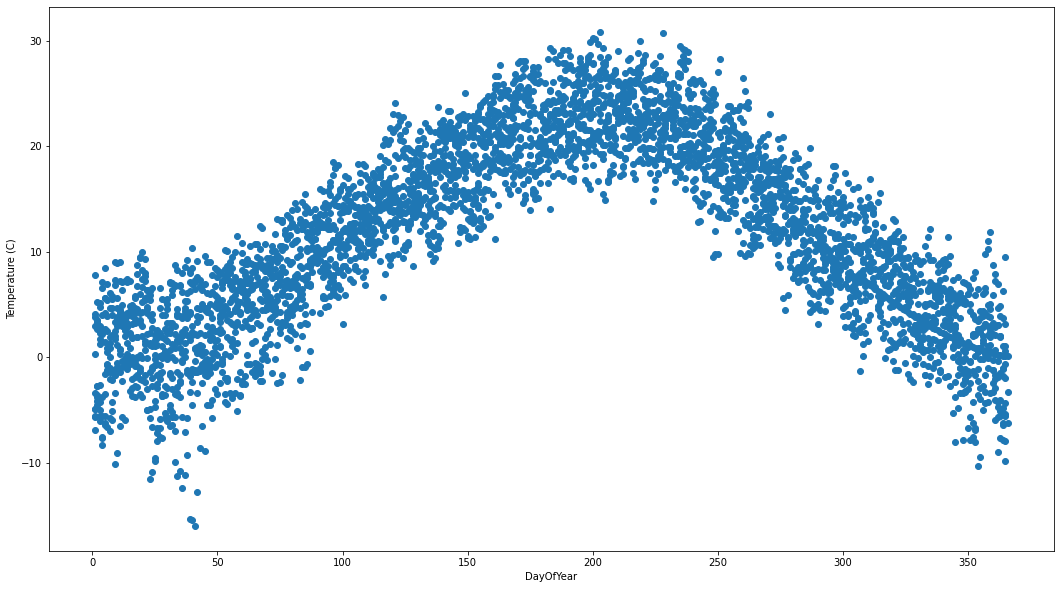

In [5]:
fig = plt.figure(figsize=(18, 10))
plt.scatter(temperature_average['DayOfYear'], temperature_average['Temperature (C)'])
plt.xlabel('DayOfYear')
plt.ylabel('Temperature (C)')

In [85]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(16, input_dim = 1, activation='relu'), 
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(16, activation='relu'),
                tf.keras.layers.Dense(1, activation='linear'),
])

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(temperature_average['DayOfYear'],
                                                    temperature_average['Temperature (C)'], test_size = 0.1)

In [87]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1 ,1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1 ,1)

In [93]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
              loss = tf.keras.losses.mean_absolute_error)

In [94]:
model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
114/114 [==============================] - 1s 3ms/step - loss: 7.4631
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4619
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4607
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4597
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4582
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4568
Epoch 7/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4556
Epoch 8/100
114/114 [==============================] - 0s 4ms/step - loss: 7.4544
Epoch 9/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4537
Epoch 10/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4526
Epoch 11/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4516
Epoch 12/100
114/114 [==============================] - 0s 3ms/step - loss: 7.4510
Epoch 13/100


In [95]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 2ms/step - loss: 7.5488


7.5488481521606445